# Funnel Analisys
Data used for this project contains 5 csv files each representing page visited on a e-commerce website. Each csv has one common column "user_id" and has all unique such that each row representing one customer and their behaviour on this website. Before we get started let's import few libraries

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go #dynamic graphs using plotly
import plotly.offline as py #Make plotly available offline so, now we don't need to create an account on plotly  
import warnings #ignore all warnings eg. "deprecated functions"
warnings.filterwarnings("ignore")
py.init_notebook_mode(connected=True) 

#### Let's check all those csv's that we talked about earlier
These table are self-explanatory, you should be getting clear idea what exactly the contents are.
"user_table" - info about the user

# Columns:

#### user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables

#### date : the date when the user firstly landed on the site

#### device : user device. Can be mobile or desktop

#### sex : male/female

In [2]:
user_table = pd.read_csv('user_table.csv')
user_table.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male
5,993454,2015-03-03,Desktop,Male
6,377150,2015-04-15,Desktop,Female
7,137258,2015-01-27,Mobile,Male
8,608249,2015-04-12,Desktop,Female
9,615615,2015-02-24,Mobile,Female


"home_page_table" - Users who landed on the home page
# Columns:

##### user_id :  the Id of the user. It is unique by user and can be joined to user id in all other tables

##### page : it is always home_page.

In [3]:
home_page = pd.read_csv('home_page_table.csv')
home_page.head()

"search_page_table" - Users who landed on the search_page

# Columns:

#### user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables

#### page : it is always search_page

In [4]:
search_page = pd.read_csv('search_page_table.csv')
search_page.head()

"payment_page_table" - Users who landed on the payment_page

# Columns:

#### user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables

#### page : it is always payment_page

In [5]:
payment_page = pd.read_csv('payment_page_table.csv')
payment_page.head()

"payment_confirmation_table" - Users who landed on the
payment_confirmation_table. That is, these are the users who bought the product.

# Columns:
#### user_id : the Id of the user. It is unique by user and can be joined to user id in all other tables
#### page : it is always payment_confirmation_page

In [6]:
payment_confirmation = pd.read_csv('payment_confirmation_table.csv')
payment_confirmation.head()

Following printed values is an easy way of doing funnel analysis but that's not the professional way to do it. We need to create a graphical representation for all this tables and there respective values. To do this we will use plotly graphs - Scatter function. 
###### Note: The Scatter function is same as pointplots but we will use this function to adjust our funnel size (each section) based upon their values. We will get on to that in later part of this tutorial. Alright?

In [7]:
print len(user_table)
print len(home_page)
print len(search_page)
print len(payment_page)
print len(payment_confirmation)

90400
90400
45200
6030
452


Quick check on null values if any.......Perfect No Nulls, great!

In [8]:
user_table[user_table.isnull()].sum()

user_id    0.0
date       0.0
device     0.0
sex        0.0
dtype: float64

Now we will merge each of these tables (one by one) on "user_id" column. Because the user_table is superset of all id's in each table so, left join.

In [10]:
table = pd.merge(user_table,home_page,on='user_id',how='left')

In [34]:
table = pd.merge(table,search_page,on='user_id',how='left')

In [12]:
table = pd.merge(table,payment_page,on='user_id',how='left')
data = pd.merge(table,payment_confirmation,on='user_id',how='left')
data.head()

,user_id,date,device,sex,page_x,page_y,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


Renaming those attribute columns where their names are duplicated. Assign column names with respective table names

In [13]:
data.columns = ['user_id', u'date', u'device', u'sex','home_page','search_page','payment_page','confirmation_page']

In [14]:
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [15]:
data = data.fillna('None')
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,None,None,None
1,756838,2015-01-13,Desktop,Male,home_page,None,None,None
2,568983,2015-04-09,Desktop,Male,home_page,search_page,None,None
3,190794,2015-02-18,Desktop,Female,home_page,search_page,None,None
4,537909,2015-01-15,Desktop,Male,home_page,None,None,None


In [16]:
data['confirmation_page'].value_counts()

None                         89948
payment_confirmation_page      452
Name: confirmation_page, dtype: int64

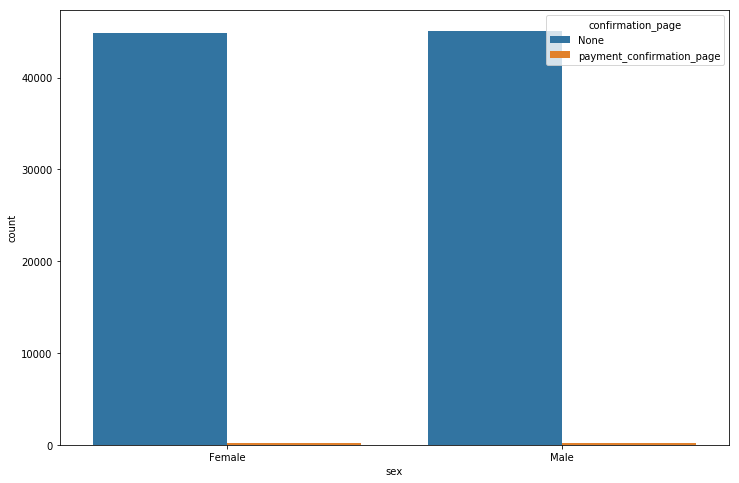

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['sex'],hue=data['confirmation_page'])
plt.show()

In [20]:
from __future__ import division
values = [len(home_page),len(search_page),len(payment_page),len(payment_confirmation)]
phases = ['home','search','payment','purchased']

colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data1 = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig)

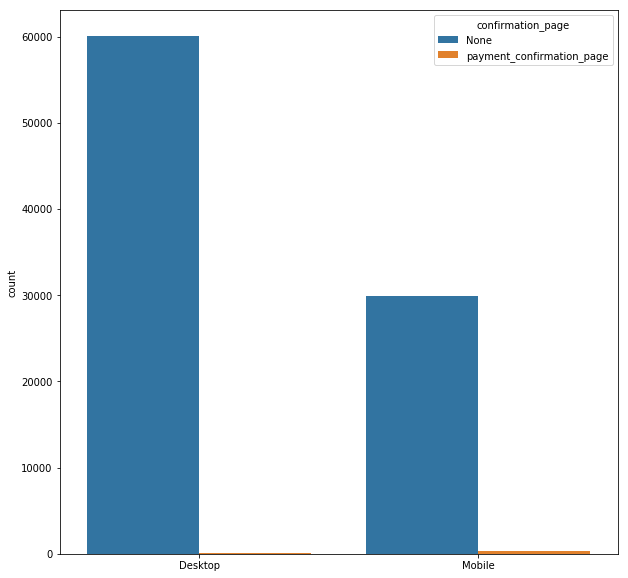

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['device'].values,hue=data['confirmation_page'])
plt.show()

In [22]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,None,None,None
1,756838,2015-01-13,Desktop,Male,home_page,None,None,None
2,568983,2015-04-09,Desktop,Male,home_page,search_page,None,None
3,190794,2015-02-18,Desktop,Female,home_page,search_page,None,None
4,537909,2015-01-15,Desktop,Male,home_page,None,None,None


In [23]:
import datetime
Month = []
Year = []
Day = []
Week_num = []
fmt = '%Y-%m-%d'

In [24]:
for i, date in enumerate(data['date']):
    t = date.to_pydatetime()
    Year.append(t.year)
    Month.append(t.month)
    Day.append(t.day)
    Week_num.append(t.isocalendar()[1])
data['Year'] = Year
data['Month'] = Month
data['Day'] = Day
data['Week_num'] = Week_num
data.head()

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page,Year,Month,Day,Week_num
0,450007,2015-02-28,Desktop,Female,home_page,None,None,None,2015,2,28,9
1,756838,2015-01-13,Desktop,Male,home_page,None,None,None,2015,1,13,3
2,568983,2015-04-09,Desktop,Male,home_page,search_page,None,None,2015,4,9,15
3,190794,2015-02-18,Desktop,Female,home_page,search_page,None,None,2015,2,18,8
4,537909,2015-01-15,Desktop,Male,home_page,None,None,None,2015,1,15,3


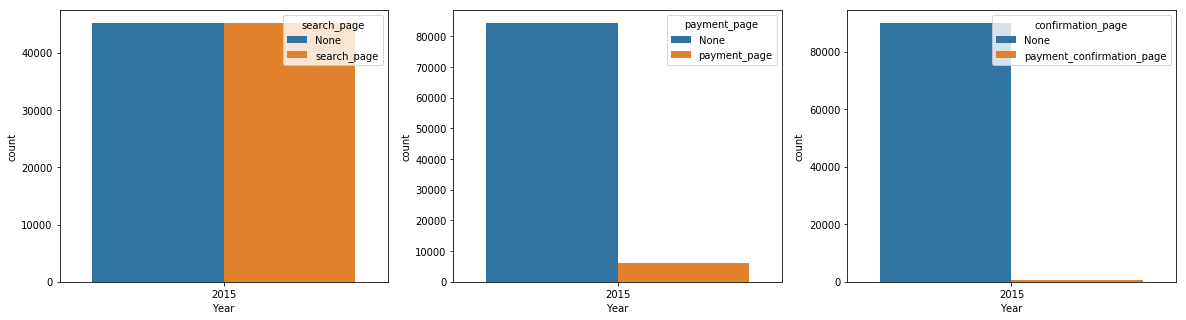

In [25]:
fig, ax1 = plt.subplots(figsize=(20,5),ncols=3,nrows=1)
sns.countplot(x=data['Year'],hue=data['search_page'],ax=ax1[0])
sns.countplot(x=data['Year'],hue=data['payment_page'],ax=ax1[1])
sns.countplot(x=data['Year'],hue=data['confirmation_page'],ax=ax1[2])
plt.show()

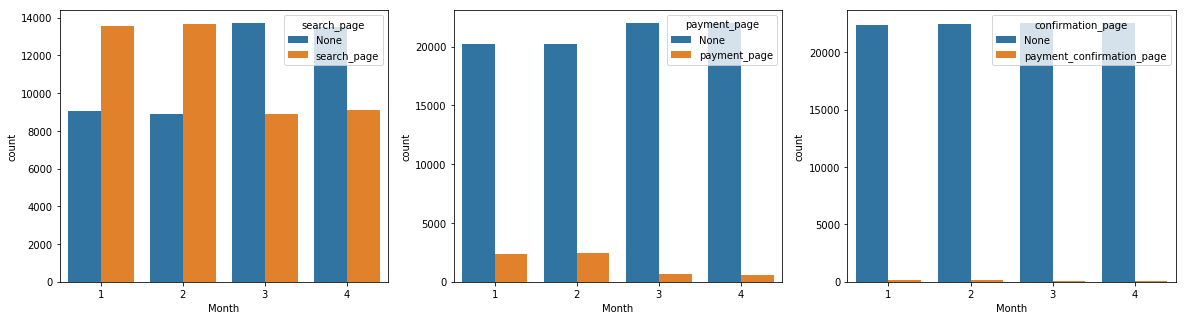

In [26]:
fig, ax1 = plt.subplots(figsize=(20,5),ncols=3,nrows=1)
sns.countplot(x=data['Month'],hue=data['search_page'],ax=ax1[0])
sns.countplot(x=data['Month'],hue=data['payment_page'],ax=ax1[1])
sns.countplot(x=data['Month'],hue=data['confirmation_page'],ax=ax1[2])
plt.show()

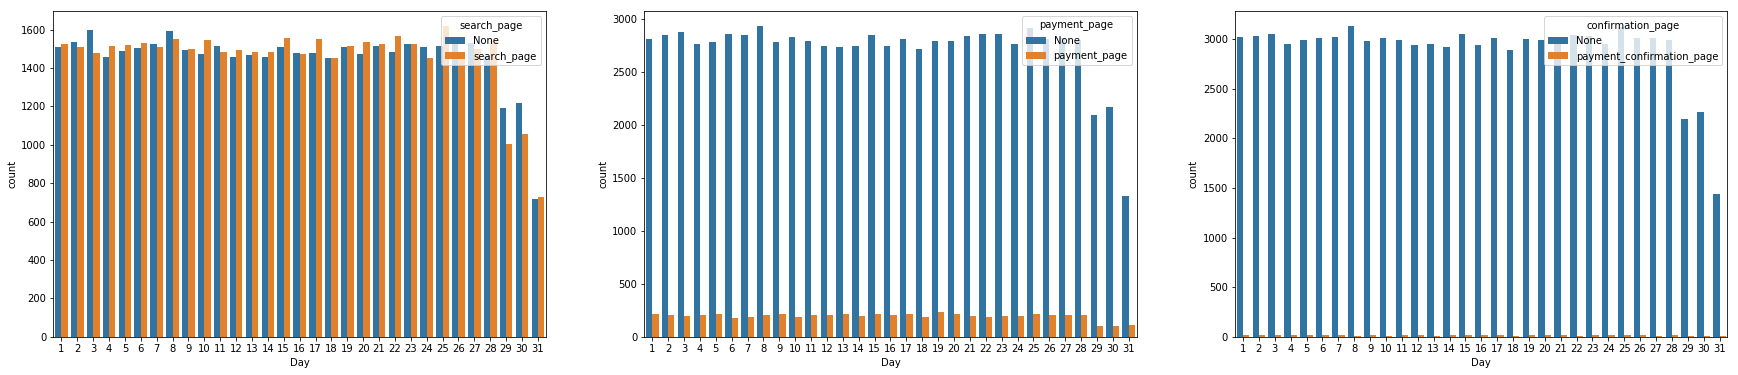

In [27]:
fig, ax1 = plt.subplots(figsize=(30,6),ncols=3,nrows=1)
sns.countplot(x=data['Day'],hue=data['search_page'],ax=ax1[0])
sns.countplot(x=data['Day'],hue=data['payment_page'],ax=ax1[1])
sns.countplot(x=data['Day'],hue=data['confirmation_page'],ax=ax1[2])
plt.show()

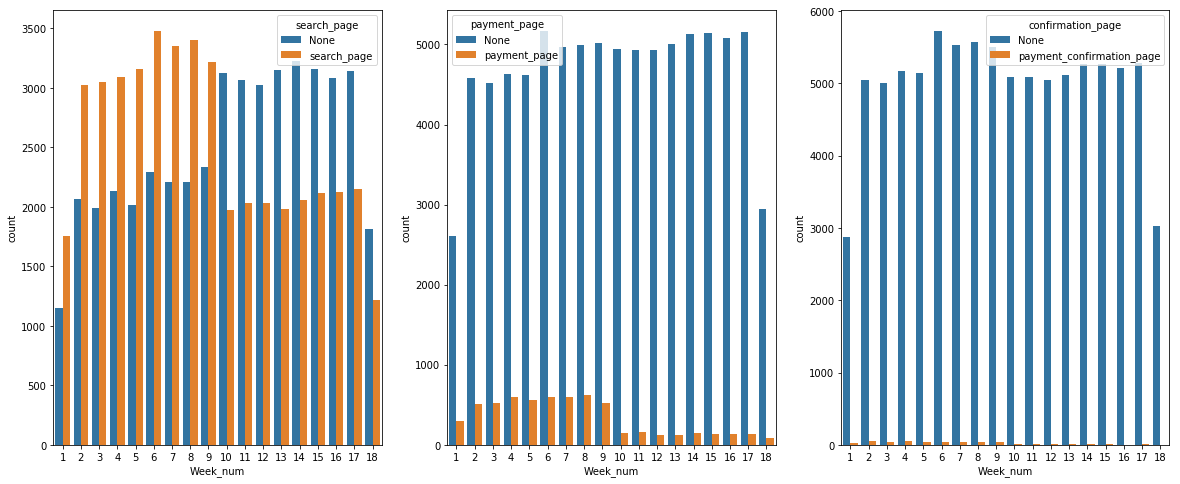

In [28]:
fig, ax1 = plt.subplots(figsize=(20,8),ncols=3,nrows=1)
sns.countplot(x=data['Week_num'],hue=data['search_page'],ax=ax1[0])
sns.countplot(x=data['Week_num'],hue=data['payment_page'],ax=ax1[1])
sns.countplot(x=data['Week_num'],hue=data['confirmation_page'],ax=ax1[2])
plt.show()

In [29]:
data1 = data[data['payment_page']=='payment_page']
d1 = data1.groupby(['Month'])['payment_page'].count()
d1

Month
1    2390
2    2412
3     631
4     597
Name: payment_page, dtype: int64

In [30]:
data2 = data1[data1['confirmation_page']=='payment_confirmation_page']
d2 = data2.groupby(['Month'])['confirmation_page'].count()
d2

Month
1    189
2    173
3     44
4     46
Name: confirmation_page, dtype: int64

In [31]:
d2.values/d1.values

array([0.0790795 , 0.07172471, 0.06973059, 0.07705193])

In [32]:
data3 = data[data['search_page']=='search_page']
d3 = data3.groupby(['Month'])['search_page'].count()
d3

Month
1    13554
2    13687
3     8879
4     9080
Name: search_page, dtype: int64

In [33]:
d1.values/d3.values

array([0.17633171, 0.17622562, 0.07106656, 0.0657489 ])